# Converting Feature Classes to GeoDataframes


### Using Geopandas
* http://geopandas.org/io.html

*Importing feature classes using GeoPandas is easy with the `read_file()` command. What's worth noting is that GeoPandas actually uses the Python [Fiona](https://fiona.readthedocs.io/en/latest/manual.html) package. Fiona leverages a collection of drivers that provide access to a number of geospatial data formats. Geopandas simplifies the usage of Fiona commands, making import and export of geodataframes easier to use.*

### Reading a shapefile into a GeoDataFrame
* Read in `./data/12Digit_HUC_Subwatersheds.shp` into a geodataframe

In [1]:
#Import geopandas
import geopandas as gpd

In [2]:
#Create a variable pointing to the shapefile. 
theShapefile = './data/12Digit_HUC_Subwatersheds.shp'

In [3]:
#Read the shapefile directly into a geodataframe
# using fiona package (read_file)
gdf_HUC12 = gpd.read_file(theShapefile)

### Exploring the geodataframe

In [4]:
#View the first 5 rows
gdf_HUC12.head()

,FID,HUC_8,HUC_10,HUC_12,ACRES,HU_10_NAME,HU_12_NAME,META_ID,STATES,Basin,Dig_8,DWQ_Basin,geometry
0,1,03040208,0304020802,030402080205,7321,Shallotte River,Holden Beach-Long Bay,NC01,NC,LBR,3040208,Lumber,"MULTIPOLYGON (((-78.38724 33.89810, -78.38902 ..."
1,2,03030005,0303000508,030300050804,18971,Cape Fear River,Frying Pan Shoals-Cape Fear River,NC01,NC,CPF,3030005,Cape Fear,"MULTIPOLYGON (((-78.01315 33.88848, -78.01196 ..."
2,3,03040208,0304020801,030402080108,8639,Lockwoods Folly River,Town of Long Beach-Long Beach,NC01,NC,LBR,3040208,Lumber,"POLYGON ((-78.10634 33.90837, -78.10581 33.908..."
3,4,03040208,0304020802,030402080201,9136,Shallotte River,Upper Shallotte River,NC01,NC,LBR,3040208,Lumber,"POLYGON ((-78.44404 33.97957, -78.44434 33.978..."
4,5,03040208,0304020801,030402080107,7610,Lockwoods Folly River,Town of Long Beach-Montgomery Slough,NC01,NC,LBR,3040208,Lumber,"POLYGON ((-78.14777 33.95042, -78.14716 33.949..."


In [6]:
#View info for the dataframe
gdf_HUC12.info() #shapefiles include information about a column type unlike csv format, thats why HUC_8, 10 and 12 although
# they are fully numbers they show as objects and not integers

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         1767 non-null   int64   
 1   HUC_8       1767 non-null   object  
 2   HUC_10      1767 non-null   object  
 3   HUC_12      1767 non-null   object  
 4   ACRES       1767 non-null   int64   
 5   HU_10_NAME  1767 non-null   object  
 6   HU_12_NAME  1767 non-null   object  
 7   META_ID     1767 non-null   object  
 8   STATES      1767 non-null   object  
 9   Basin       1767 non-null   object  
 10  Dig_8       1767 non-null   int64   
 11  DWQ_Basin   1767 non-null   object  
 12  geometry    1767 non-null   geometry
dtypes: geometry(1), int64(3), object(9)
memory usage: 179.6+ KB


In [7]:
#Display a specific record
gdf_HUC12.loc[10]

FID                                                          11
HUC_8                                                  03040206
HUC_10                                               0304020606
HUC_12                                             030402060605
ACRES                                                      8272
HU_10_NAME                            Gore Creek-Waccamaw River
HU_12_NAME                          Regan Branch-Waccamaw River
META_ID                                                    NC01
STATES                                                       NC
Basin                                                       LBR
Dig_8                                                   3040206
DWQ_Basin                                                Lumber
geometry      POLYGON ((-78.58374604910919 34.0595876285612,...
Name: 10, dtype: object

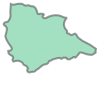

shapely.geometry.polygon.Polygon

In [10]:
#Display a specific geometry
display(gdf_HUC12.loc[10,'geometry'])
type(gdf_HUC12.loc[10,'geometry']) #geopandas go back and forth with shapely

<AxesSubplot:>

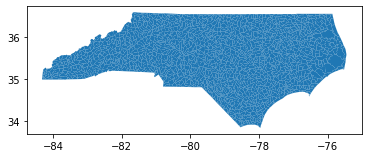

In [11]:
#Display as simple polygon FC
gdf_HUC12.plot()

<AxesSubplot:>

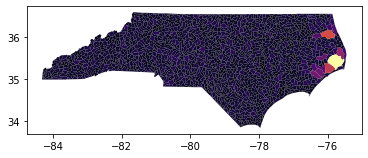

In [13]:
#Display acres as continuous values
gdf_HUC12.plot('ACRES', cmap='inferno')

<AxesSubplot:>

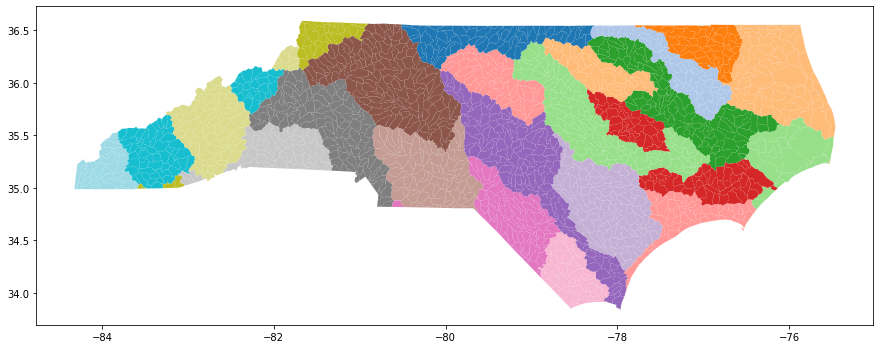

In [14]:
#Display as chorpleth map using HUC8 attribute
gdf_HUC12.plot('HUC_8', cmap='tab20', figsize=(15, 8))

---
### Reading GeoJSON data
* Read in the `./data/NC_NPDES.json` data ([Source](https://services.nconemap.gov/secure/rest/services/NC1Map_Environment/FeatureServer/4/query?where=OBJECTID>0&outFields=*&f=geojson) - in JSON format) into a geodataframe

In [15]:
#Read the data in
gdf_NPDES = gpd.read_file('./data/NC_NPDES.json')

#### Explore as above, then plot on a given attribute

<AxesSubplot:>

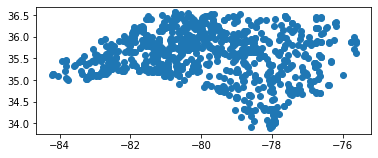

In [16]:
#Plot the feature class
gdf_NPDES.plot()
